# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [2]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [3]:
df = pd.read_feather('clustered.feather')

In [4]:
df.sample(3)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
62533,3,4,3,18,8,4.0000,2,0,5,1,0,0,0,0,1,0,1,1,1.0000,4,5704.7759,15.9700,15.4785,13.1490,4.9448,36.0412,3.4340,169.0178,87,22.2362,11.1239,27.4820,0.4685,9.4096,1.3983,1.0378,1.0531,0.7704,0.1268,26.0986,-11.1724,62.1652,-0.1507,33.0080,0.0758,0
80077,7,3,4,24,16,7.0000,1,2,1,1,1,0,0,0,0,1,0,0,2.0000,3,942.3342,12.5466,12.3016,9.3407,2.4772,23.3103,3.1781,48.9318,-39,5.8463,6.5118,18.2051,0.6510,7.5263,1.8006,0.7447,4.2707,1.3915,0.1841,19.3808,-8.3236,29.4764,-0.1647,19.8166,2.7373,0
31007,8,5,7,24,9,7.0000,1,2,1,0,0,1,1,1,1,0,0,0,1.0000,1,1743.4057,8.9332,12.7122,10.4741,7.8331,43.2492,3.5835,63.5810,-53,8.1338,4.7454,18.7168,0.7132,7.2943,1.7931,0.8567,2.7619,0.1199,0.0988,29.5065,-8.0754,102.2848,0.1350,30.2525,3.3269,0


In [5]:
continuous_columns = [
      'disposable_income', 'age_boxcox', 
    'annual_income_boxcox', 'monthly_inhand_salary_boxcox', 'interest_rate_boxcox', 
    'outstanding_debt_square', 'credit_utilization_ratio_log', 'credit_history_age_boxcox', 
    'total_emi_per_month_square', 'amount_invested_monthly_boxcox', 'monthly_balance_boxcox', 
    'credit_limit_change_rate_exp', 'debt_income_ratio_log', 'loan_income_ratio_month_boxcox', 
    'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 
    'investment_to_income_ratio_square', 'total_credit_exposure_boxcox', 
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec', 'income_stability_boxcox', 
    'total_liability_boxcox', 'debt_paytime_log','changed_credit_limit_cube'
]

Ordinal_columns = [
    'num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date', 'num_credit_inquiries',
    'num_of_delayed_payment', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 
      'age_group', 'Cluster' ,'credit_inquiry_per_loan'
]

print(len(continuous_columns) + len(Ordinal_columns))

37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   num_bank_accounts                          100000 non-null  int8   
 1   num_credit_card                            100000 non-null  int8   
 2   num_of_loan                                100000 non-null  int8   
 3   delay_from_due_date                        100000 non-null  int8   
 4   num_of_delayed_payment                     100000 non-null  int8   
 5   num_credit_inquiries                       100000 non-null  float64
 6   credit_mix                                 100000 non-null  int8   
 7   payment_of_min_amount                      100000 non-null  int8   
 8   payment_behaviour                          100000 non-null  int8   
 9   credit_score                               100000 non-null  int8   
 10  Mortgage 

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [7]:
x = df.drop('credit_score',axis=1)
y = df[['credit_score']]

In [8]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
num_bank_accounts,100000.0000,5.3688,2.5933,0.0000,3.0000,5.0000,7.0000,11.0000
num_credit_card,100000.0000,5.5336,2.0671,0.0000,4.0000,5.0000,7.0000,11.0000
num_of_loan,100000.0000,3.5329,2.4464,0.0000,2.0000,3.0000,5.0000,9.0000
delay_from_due_date,100000.0000,21.0814,14.8046,0.0000,10.0000,18.0000,28.0000,62.0000
num_of_delayed_payment,100000.0000,13.3131,6.2372,0.0000,9.0000,14.0000,18.0000,25.0000
num_credit_inquiries,100000.0000,5.7983,3.8678,0.0000,3.0000,5.0000,8.0000,17.0000
credit_mix,100000.0000,1.0662,0.7329,0.0000,1.0000,1.0000,2.0000,2.0000
payment_of_min_amount,100000.0000,1.1666,0.9231,0.0000,0.0000,2.0000,2.0000,2.0000
payment_behaviour,100000.0000,2.2379,1.8613,0.0000,0.0000,2.0000,4.0000,5.0000
Mortgage Loan,100000.0000,0.3136,0.4640,0.0000,0.0000,0.0000,1.0000,1.0000


In [9]:
y.describe()

,credit_score
count,100000.0000
mean,0.8883
std,0.6751
min,0.0000
25%,0.0000
50%,1.0000
75%,1.0000
max,2.0000


In [10]:
y.value_counts()

credit_score
1               53174
0               28998
2               17828
Name: count, dtype: int64

In [11]:
original_features=['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date','num_of_delayed_payment',
     'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 'payment_behaviour', 'age_boxcox',
     'total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',]

all_features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 'payment_behaviour',
    'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox','total_credit_exposure_boxcox',
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec','debt_paytime_log','interest_rate_boxcox',
    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'outstanding_debt_square','credit_inquiry_per_loan','changed_credit_limit_cube']

revised_features = ['num_bank_accounts','num_credit_card','num_of_loan','num_of_delayed_payment', 'delay_from_due_date',
                    'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 'payment_behaviour',
                    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox',
                    'annual_income_boxcox','total_liability_boxcox','outstanding_debt_square','savings_rate_rec']

imp_fea = ['credit_mix','outstanding_debt_square','credit_utilization_ratio_log','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','payment_behaviour','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox','total_emi_per_month_square',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log','amount_invested_monthly_boxcox','savings_rate_rec',
    'income_stability_boxcox','age_boxcox','changed_credit_limit_cube']


## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [12]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [13]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(107143, 45) ---- (107143, 1)
(30000, 45) ---- (30000, 1)


In [14]:
x_test.sample(2)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
57280,2,5,0,6,7,1.0000,2,0,5,0,0,0,0,0,0,0,0,1.0000,3,2722.6367,13.6102,13.7645,11.2580,0.8291,27.7507,3.4012,163.2403,8,0.0000,7.7892,23.1513,0.3676,8.7031,2.3142,1.0866,0.9395,2.6414,0.1337,21.8834,-9.4463,55.9011,-0.0955,21.9574,6.6465,0
22819,7,8,5,40,22,11.0000,0,2,1,0,0,1,1,0,0,0,0,2.0000,3,1308.3791,12.9787,12.7183,9.9603,6.7454,60.0005,3.5835,19.8172,27,8.0745,3.5867,18.6228,0.6352,7.2240,1.7230,0.8960,6.0742,1.5884,0.0886,36.6362,-8.0815,127.2315,-0.1416,37.5396,3.9961,1


In [15]:
y_test.sample(2)

,credit_score
6267,2
86405,1


## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train[continuous_columns])
x_test_scaled = scaler.transform(x_test[continuous_columns])

In [17]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

In [18]:
x_train_scaled_continuous = pd.DataFrame(x_train_scaled, columns=continuous_columns)
x_test_scaled_continuous = pd.DataFrame(x_test_scaled, columns=continuous_columns)

In [19]:
x_train_scaled_df = pd.concat([x_train_scaled_continuous.reset_index(drop=True), x_train[Ordinal_columns].reset_index(drop=True)], axis=1)
x_test_scaled_df = pd.concat([x_test_scaled_continuous.reset_index(drop=True), x_test[Ordinal_columns].reset_index(drop=True)], axis=1)

In [20]:
x_train_scaled_df

,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,changed_credit_limit_cube,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_credit_inquiries,num_of_delayed_payment,credit_mix,payment_of_min_amount,payment_behaviour,age_group,Cluster,credit_inquiry_per_loan
0,0.8432,0.2145,0.9431,0.9492,0.4786,0.2627,0.7005,0.9016,0.6741,0.8000,0.7279,0.3004,0.6881,0.5800,0.7599,0.4076,0.5409,0.3548,0.3330,0.2089,0.6949,0.5506,0.3710,0.1951,0.7520,3,7,3,7,3.0000,14,2,0,2,1,0,1.0000
1,0.5726,0.3496,0.8083,0.8222,0.4786,0.4413,0.7565,0.9761,0.0000,0.8224,1.0000,0.4611,0.8018,0.9870,0.7131,0.3919,1.0000,0.5328,0.5257,0.3380,0.4222,0.4714,0.4791,1.0000,0.0569,4,3,0,3,2.0000,14,2,0,5,2,0,2.0000
2,0.2725,0.6130,0.5419,0.5901,0.2063,0.4663,0.6107,0.9717,0.3891,0.4592,0.5071,0.4199,0.5365,0.5416,0.8843,0.3523,0.4660,0.4120,0.5493,0.5260,0.5839,0.4596,0.5186,0.4758,0.3943,1,3,3,11,4.0000,11,2,1,3,3,0,1.0000
3,0.4560,0.5449,0.7376,0.7561,0.9266,0.5414,0.5465,0.2660,0.5236,0.6622,0.7118,0.6127,0.6064,0.5461,0.5873,0.7210,0.5125,0.4459,0.6209,0.3454,0.5302,0.4279,0.5962,0.4387,0.8455,5,4,4,8,5.0000,16,1,2,3,2,0,1.0000
4,0.4875,0.7427,0.7409,0.7751,0.3398,0.4283,0.3275,0.3333,0.4325,0.6389,0.7142,0.6526,0.6560,0.6308,0.3591,0.6149,0.6120,0.3968,0.5096,0.2873,0.6107,0.6049,0.4870,0.4281,0.6992,7,4,2,9,5.0000,13,1,1,3,3,0,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107138,0.4349,0.8451,0.7119,0.7400,0.2063,0.2920,0.5158,0.9540,0.4595,0.5292,0.8421,0.3692,0.5712,0.5862,0.5763,0.1688,0.2045,0.3194,0.3644,0.3596,0.7802,0.4960,0.3584,0.3177,0.8455,5,7,2,4,0.0000,3,2,1,4,3,0,0.0000
107139,0.2635,0.8650,0.5467,0.5796,0.2992,0.2355,0.2863,0.9683,0.4045,0.4039,0.5875,0.3447,0.4917,0.5167,0.4864,0.2545,0.2378,0.3514,0.2949,0.4440,0.7024,0.2984,0.2917,0.2966,0.3293,5,4,4,8,2.0000,5,2,0,3,3,0,1.0000
107140,0.2613,0.6579,0.5063,0.5747,0.1510,0.5146,0.6952,0.8908,0.3262,0.6991,0.6389,0.1416,0.4893,0.5987,0.8963,0.3834,0.5848,0.7896,0.5964,0.5755,0.2430,0.6359,0.5586,0.5444,0.4959,1,5,2,6,4.0342,12,2,0,3,3,0,2.0000
107141,0.4200,0.2655,0.6908,0.7268,0.3216,0.2145,0.6661,0.8193,0.3338,0.6927,0.6629,0.4335,0.6826,0.6852,0.7927,0.2520,0.3925,0.5214,0.2707,0.4147,0.4365,0.5540,0.2537,0.3072,0.7073,2,3,1,6,6.2144,4,2,0,2,1,0,3.0000


In [21]:
x_test_scaled_df

,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,changed_credit_limit_cube,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_credit_inquiries,num_of_delayed_payment,credit_mix,payment_of_min_amount,payment_behaviour,age_group,Cluster,credit_inquiry_per_loan
0,0.2851,0.4500,0.5419,0.5994,0.4467,0.5389,0.4055,0.7340,0.0000,0.5068,0.7190,0.4713,0.5657,0.9636,0.8520,0.3068,0.7293,0.4638,0.6178,0.4770,0.5048,0.5674,0.5716,1.0000,0.3943,1,5,0,9,0.0000,6,2,0,5,2,0,0.0000
1,0.1301,0.1270,0.2073,0.3288,0.6705,0.9764,0.7288,0.2870,0.3515,0.3145,0.3283,0.8317,0.1951,0.3346,0.4864,0.7151,0.4294,0.5648,0.9825,0.8266,0.3903,0.7083,0.9306,0.6865,0.6748,8,7,6,18,9.0000,17,0,2,0,0,0,2.0000
2,0.7222,0.7003,0.8927,0.9007,0.4786,0.4855,0.0532,0.5178,0.6428,0.7475,0.3813,0.3470,0.8086,0.5662,0.3792,0.0000,0.0000,0.3606,0.5652,0.0820,0.6823,0.5134,0.5597,0.3598,0.6016,5,2,2,3,3.0000,0,2,0,0,3,0,1.0000
3,0.1546,0.5678,0.3073,0.3895,0.9639,0.7116,0.5129,0.6144,0.2341,0.1897,0.5028,0.5055,0.3429,0.5842,0.5107,0.4737,0.6120,0.2580,0.7715,0.6976,0.9701,0.4249,0.7243,0.7074,0.3943,6,6,2,15,11.0000,13,1,2,0,2,0,4.0000
4,0.5114,0.3753,0.7805,0.7936,0.5092,0.3982,0.7288,0.6539,0.6130,0.6782,0.8474,0.4756,0.6794,0.5073,0.9009,0.0000,0.0000,0.4163,0.4818,0.3546,0.5766,0.4276,0.4801,0.3223,0.3333,1,2,4,1,4.0000,0,2,0,4,2,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.3054,0.9238,0.5948,0.6218,0.6202,0.3815,0.1990,0.8128,0.0000,0.4414,0.6802,0.1522,0.5433,0.9664,0.5320,0.4013,1.0000,0.3499,0.4603,0.3813,0.7057,0.3108,0.4184,0.9741,0.4959,4,7,0,8,4.0000,12,1,0,4,4,0,4.0000
29996,0.1900,0.7635,0.3994,0.4710,0.3776,0.5325,0.3275,0.2126,0.4147,0.3466,0.3296,0.8750,0.3628,0.4032,0.5037,0.7669,0.4924,0.4060,0.6114,0.5786,0.5941,0.4785,0.5802,0.4930,0.2642,5,6,4,28,4.0000,15,1,2,4,3,0,1.0000
29997,0.0948,0.4742,0.1081,0.1796,0.7633,0.8599,0.3672,0.3986,0.2417,0.3093,0.3920,0.7252,0.1306,0.3641,0.1831,0.6987,0.5706,0.8606,0.8920,0.8286,0.2133,0.0000,0.8415,0.7472,0.2764,10,8,5,21,6.0000,23,0,2,2,2,0,1.0000
29998,0.1334,0.4980,0.2126,0.3400,0.7633,0.7577,0.1040,0.0835,0.3708,0.5609,0.4155,0.7575,0.1854,0.3169,0.1546,1.0000,0.4121,1.0000,0.8090,0.6840,0.1506,0.8005,0.7659,0.6095,0.7520,8,8,6,20,9.0000,16,0,2,0,2,0,2.0000


## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [22]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    

    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)

Accuracy Test  - 0.7253666666666667
Accuracy Train - 1.0

Precision Test  - 0.7277028919032882
Precision Train - 1.0

Recall Test  - 0.7253666666666667
Recall Train - 1.0

F1_score Test  - 0.7260640817190656
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 6538  2025   242]
 [ 2451 11608  1814]
 [  230  1477  3615]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34922     0]
 [    0     0 36504]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      8805
           1       0.77      0.73      0.75     15873
           2       0.64      0.68      0.66      5322

    accuracy                           0.73     30000
   macro avg       0.70      0.72      0.71     30000
weighted avg       0.73      0.73      0.73     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
           1       1.00      1.00      1.0

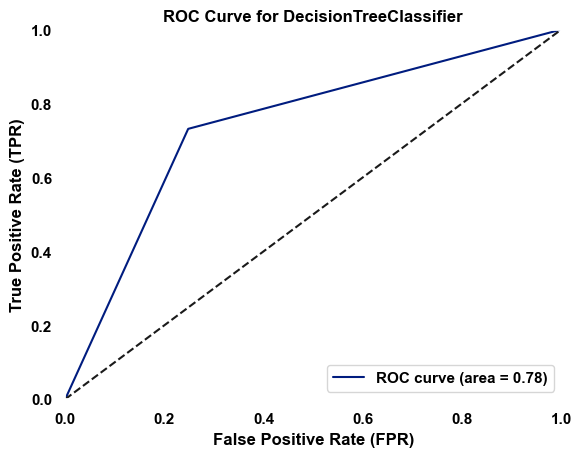

----------------------------------------


In [44]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','payment_behaviour','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log',
    'age_boxcox',]


DT_Classifier = DecisionTreeClassifier(max_depth=None,random_state=42)
evaluate_model(DT_Classifier, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                                      Feature  Importance
31                                 credit_mix      0.1957
5                     outstanding_debt_square      0.1368
4                        interest_rate_boxcox      0.0477
11               credit_limit_change_rate_exp      0.0405
7                   credit_history_age_boxcox      0.0401
28                        delay_from_due_date      0.0370
36                    credit_inquiry_per_loan      0.0301
13             loan_income_ratio_month_boxcox      0.0268
15                    reliable_payment_boxcox      0.0249
10                     monthly_balance_boxcox      0.0219
1                                  age_boxcox      0.0219
21                    income_stability_boxcox      0.0213
29                       num_credit_inquiries      0.0210
18               total_credit_exposure_boxcox      0.0210
14      credit_utilization_per_account_boxcox      0.0202
26                            num_credit_card      0.0201
12            

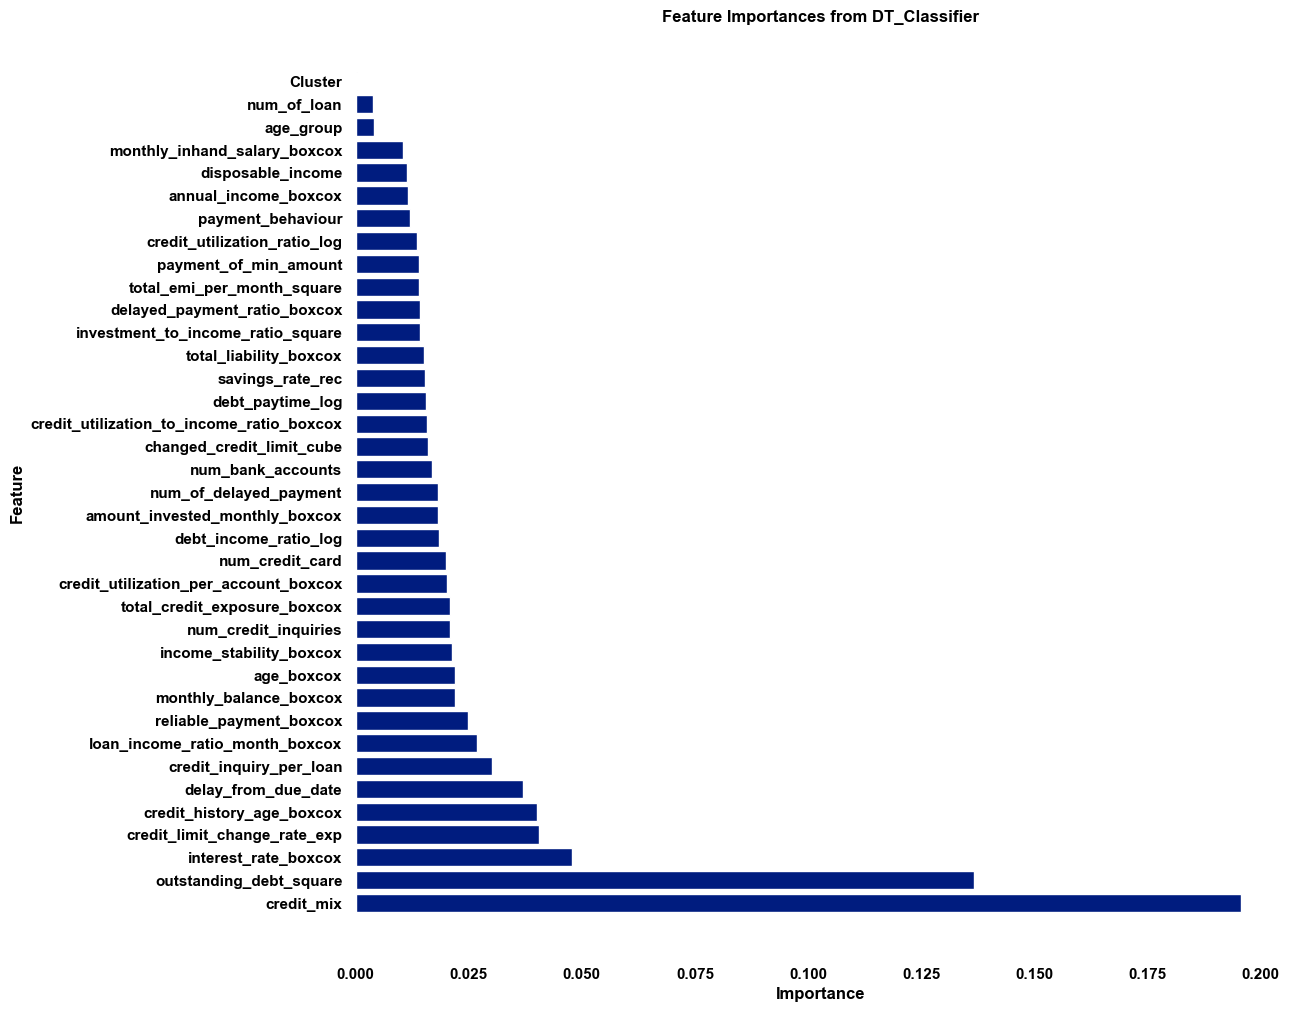

In [45]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DT_Classifier')
plt.show()

Accuracy Test  - 0.8097
Accuracy Train - 0.9999813333582221

Precision Test  - 0.8149219807878763
Precision Train - 0.9999813344034162

Recall Test  - 0.8097
Recall Train - 0.9999813333582221

F1_score Test  - 0.8101572655430052
F1_score Train - 0.9999813333522585

Confusion Matrix Test  -- 
[[ 7592  1079   134]
 [ 2028 12337  1508]
 [   46   914  4362]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    2 34920     0]
 [    0     0 36504]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8805
           1       0.86      0.78      0.82     15873
           2       0.73      0.82      0.77      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.82      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
      

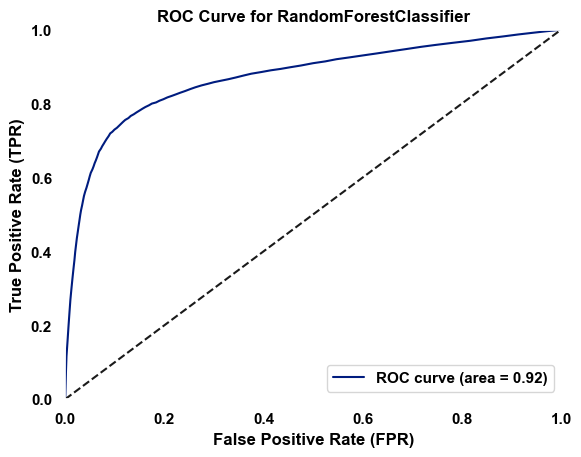

----------------------------------------


In [46]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment',]

RF_Classifier = RandomForestClassifier(n_estimators=100,random_state=42)
evaluate_model(RF_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                                      Feature  Importance
31                                 credit_mix      0.0785
5                     outstanding_debt_square      0.0665
18               total_credit_exposure_boxcox      0.0662
4                        interest_rate_boxcox      0.0611
22                     total_liability_boxcox      0.0474
28                        delay_from_due_date      0.0433
32                      payment_of_min_amount      0.0405
15                    reliable_payment_boxcox      0.0397
7                   credit_history_age_boxcox      0.0378
11               credit_limit_change_rate_exp      0.0358
29                       num_credit_inquiries      0.0289
26                            num_credit_card      0.0255
13             loan_income_ratio_month_boxcox      0.0252
14      credit_utilization_per_account_boxcox      0.0244
30                     num_of_delayed_payment      0.0212
12                      debt_income_ratio_log      0.0212
25            

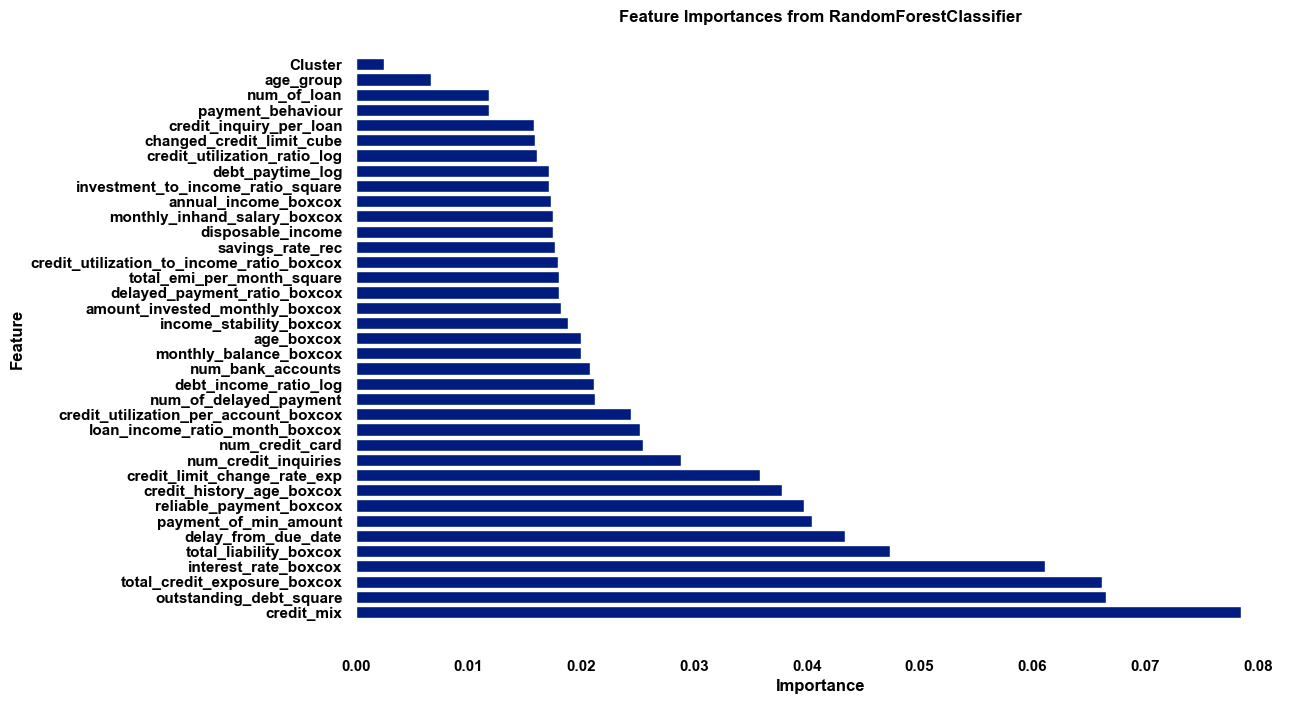

In [47]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


Accuracy Test  - 0.7659
Accuracy Train - 0.8934974753366995

Precision Test  - 0.7709747813212865
Precision Train - 0.8932330607199916

Recall Test  - 0.7659
Recall Train - 0.8934974753366995

F1_score Test  - 0.7669217481529541
F1_score Train - 0.892789829052604

Confusion Matrix Test  -- 
[[ 6850  1641   314]
 [ 2147 11951  1775]
 [   49  1097  4176]]
Confusion Matrix Train -- 
[[32194  2248  1275]
 [ 3321 28870  2731]
 [  296  1540 34668]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      8805
           1       0.81      0.75      0.78     15873
           2       0.67      0.78      0.72      5322

    accuracy                           0.77     30000
   macro avg       0.75      0.77      0.76     30000
weighted avg       0.77      0.77      0.77     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     35717
       

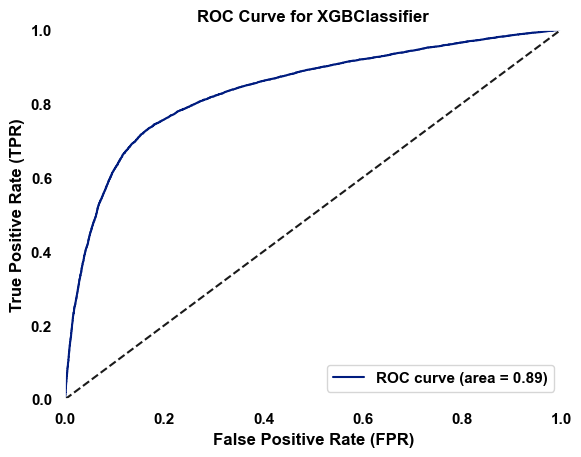

----------------------------------------


In [48]:
xgb_fea = ['credit_mix','outstanding_debt_square','num_of_loan','interest_rate_boxcox','num_credit_card','num_bank_accounts',
    'num_of_delayed_payment','delay_from_due_date','monthly_inhand_salary_boxcox','credit_history_age_boxcox','monthly_balance_boxcox']

# [["Annual_Income", "Monthly_Inhand_Salary", 
#                    "Num_Bank_Accounts", "Num_Credit_Card", 
#                    "Interest_Rate", "Num_of_Loan", 
#                    "Delay_from_due_date", "Num_of_Delayed_Payment", 
#                    "Credit_Mix", "Outstanding_Debt", 
#                    "Credit_History_Age", "Monthly_Balance"]]

xgb_Classifier = xg.XGBClassifier(random_state=42)
evaluate_model(xgb_Classifier, x_train_scaled_df, y_train, x_test_scaled_df, y_test)

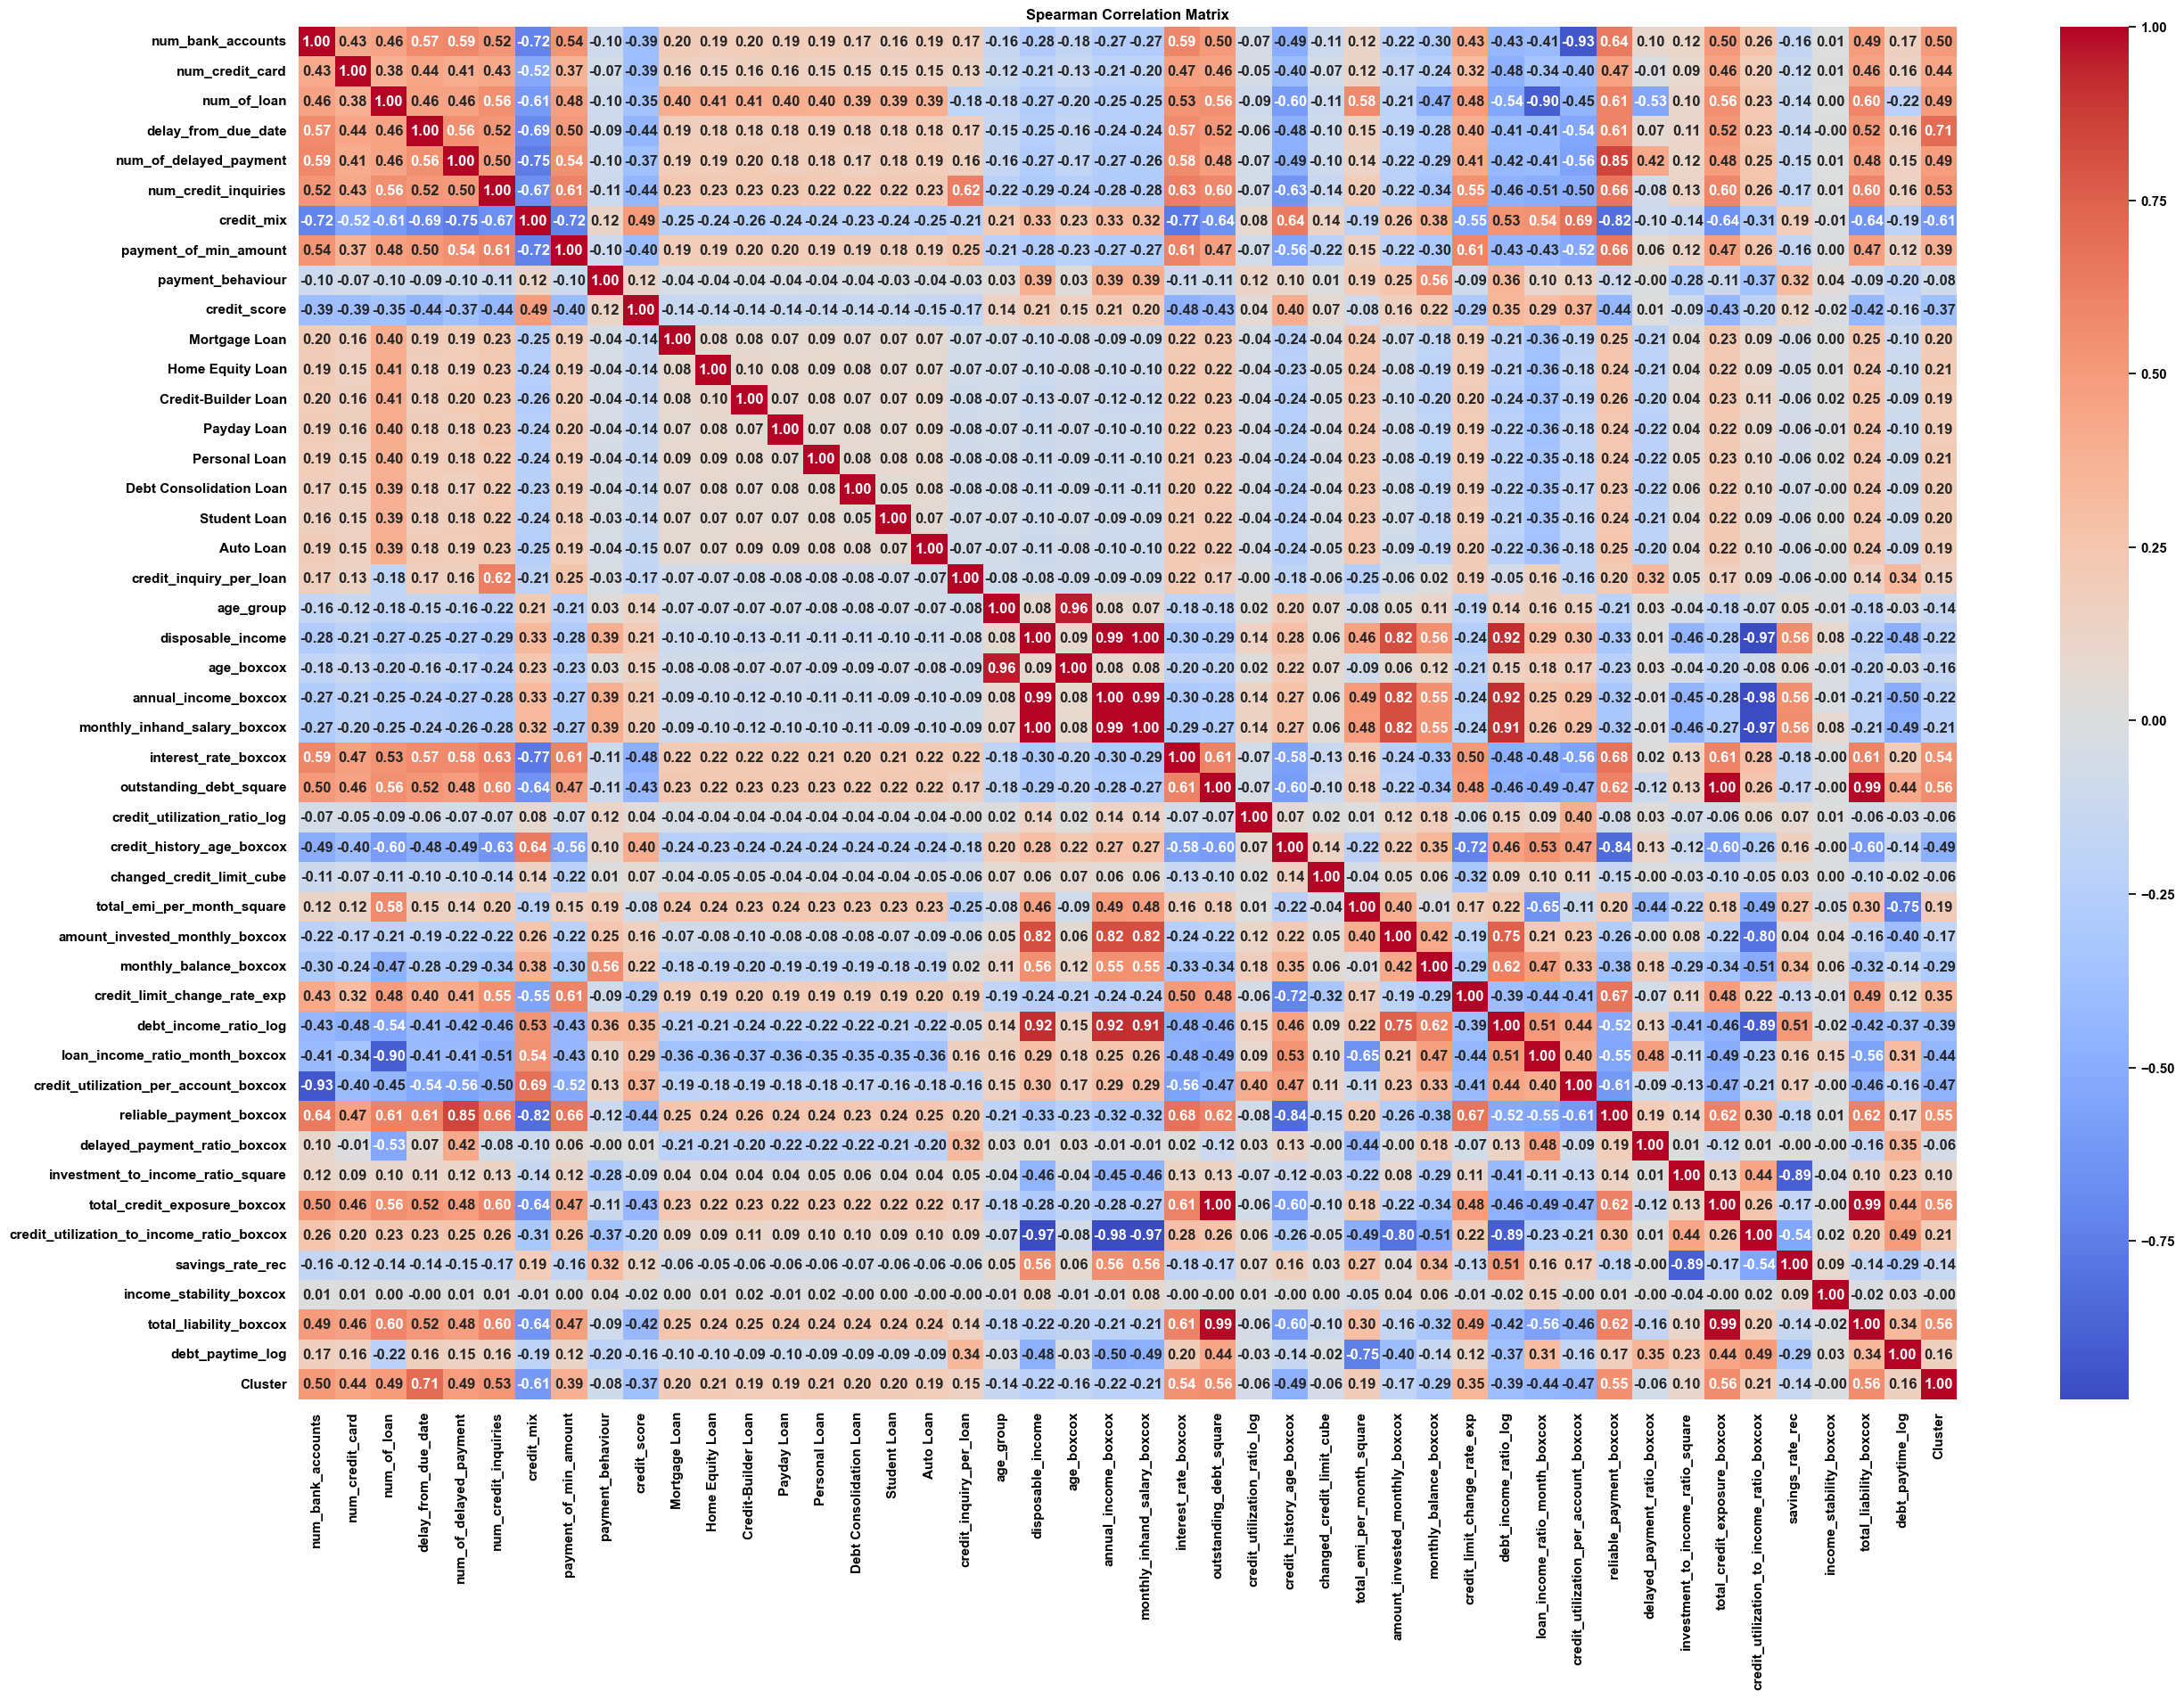

In [49]:
plt.figure(figsize=(30,20))
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

                                      Feature  Importance
31                                 credit_mix      0.2970
5                     outstanding_debt_square      0.1175
6                credit_utilization_ratio_log      0.0517
4                        interest_rate_boxcox      0.0472
32                      payment_of_min_amount      0.0457
22                     total_liability_boxcox      0.0370
26                            num_credit_card      0.0356
36                    credit_inquiry_per_loan      0.0353
25                          num_bank_accounts      0.0291
18               total_credit_exposure_boxcox      0.0284
35                                    Cluster      0.0262
30                     num_of_delayed_payment      0.0175
28                        delay_from_due_date      0.0147
29                       num_credit_inquiries      0.0147
33                          payment_behaviour      0.0142
11               credit_limit_change_rate_exp      0.0137
13            

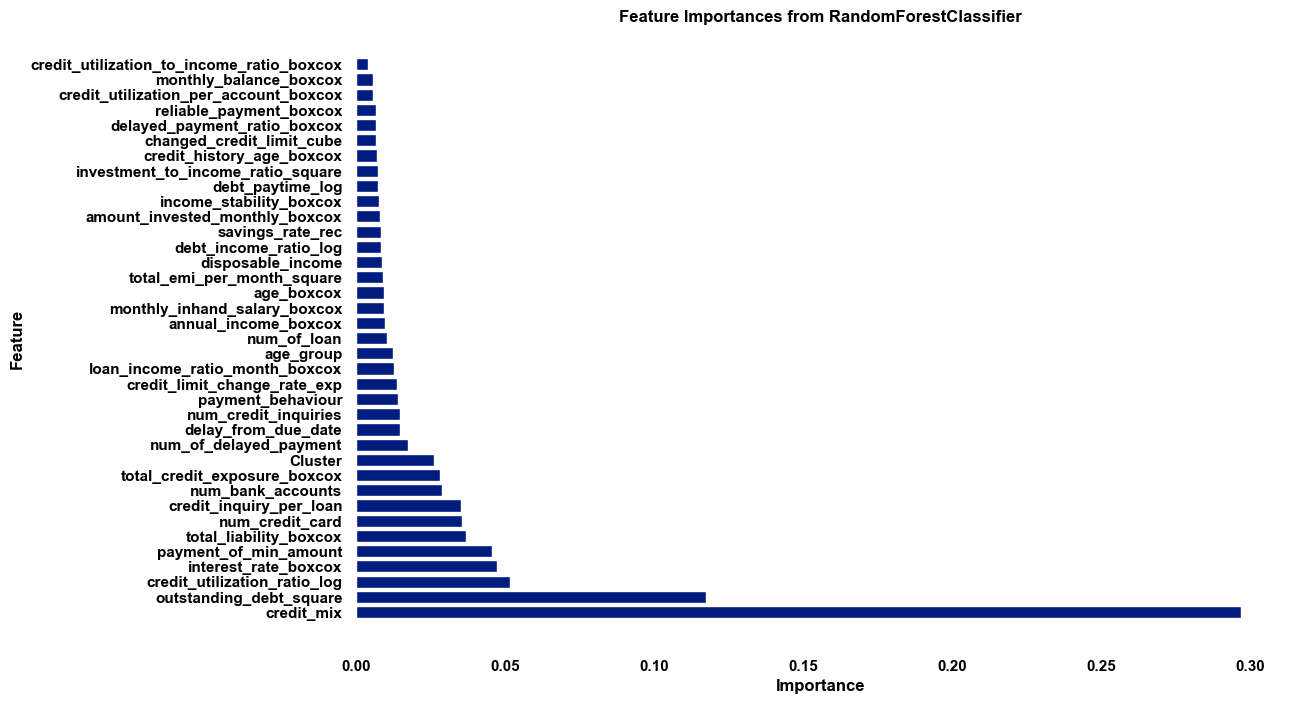

In [50]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.8081666666666667
Accuracy Train - 1.0

Precision Test  - 0.8110532194440702
Precision Train - 1.0

Recall Test  - 0.8081666666666667
Recall Train - 1.0

F1_score Test  - 0.8084672131413628
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 7483  1234    88]
 [ 1979 12482  1412]
 [   13  1029  4280]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34922     0]
 [    0     0 36504]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      8805
           1       0.85      0.79      0.82     15873
           2       0.74      0.80      0.77      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.81      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
           1       1.00      1.00      1.0

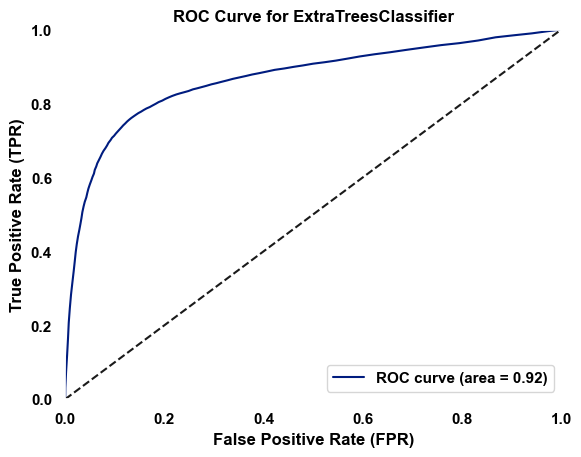

----------------------------------------


In [51]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment',]

ET_Classifier =ExtraTreesClassifier(random_state=42,)
evaluate_model(ET_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

                                      Feature  Importance
31                                 credit_mix      0.0824
32                      payment_of_min_amount      0.0706
4                        interest_rate_boxcox      0.0555
18               total_credit_exposure_boxcox      0.0496
28                        delay_from_due_date      0.0394
5                     outstanding_debt_square      0.0360
26                            num_credit_card      0.0343
29                       num_credit_inquiries      0.0330
22                     total_liability_boxcox      0.0322
25                          num_bank_accounts      0.0313
15                    reliable_payment_boxcox      0.0310
7                   credit_history_age_boxcox      0.0307
11               credit_limit_change_rate_exp      0.0303
30                     num_of_delayed_payment      0.0269
14      credit_utilization_per_account_boxcox      0.0248
27                                num_of_loan      0.0230
35            

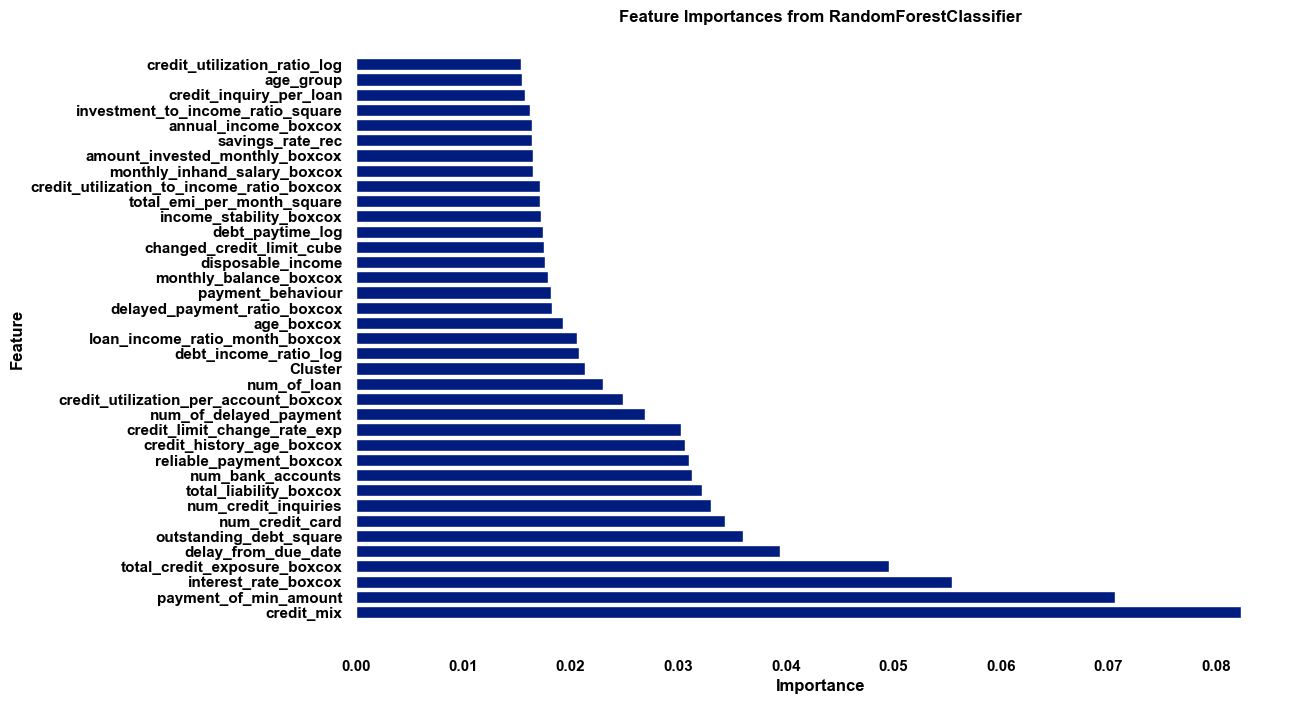

In [52]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.6470666666666667
Accuracy Train - 0.7054030594625874

Precision Test  - 0.6944115360213178
Precision Train - 0.704246570666954

Recall Test  - 0.6470666666666667
Recall Train - 0.7054030594625874

F1_score Test  - 0.650423930810486
F1_score Train - 0.7026409103042234

Confusion Matrix Test  -- 
[[6051 1353 1401]
 [3756 8944 3173]
 [ 184  721 4417]]
Confusion Matrix Train -- 
[[25046  5183  5488]
 [ 7613 20573  6736]
 [ 1035  5509 29960]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.61      0.69      0.64      8805
           1       0.81      0.56      0.67     15873
           2       0.49      0.83      0.62      5322

    accuracy                           0.65     30000
   macro avg       0.64      0.69      0.64     30000
weighted avg       0.69      0.65      0.65     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.74      0.70      0.72    

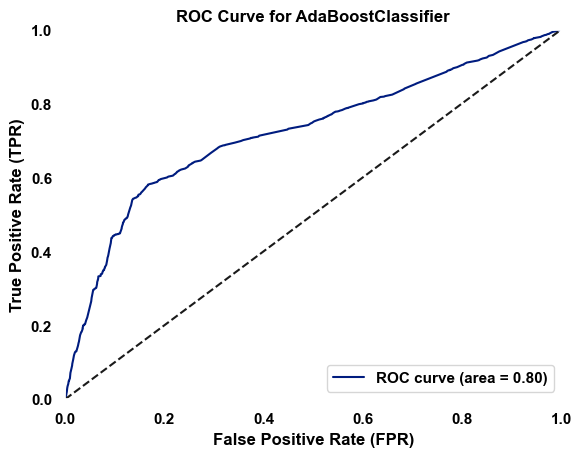

----------------------------------------


In [53]:
ADA_fea = ['credit_mix','num_credit_card','outstanding_debt_square','loan_income_ratio_month_boxcox','interest_rate_boxcox','payment_of_min_amount',
   'payment_behaviour','credit_limit_change_rate_exp','total_credit_exposure_boxcox','delay_from_due_date','credit_inquiry_per_loan']

ADA_Classifier =AdaBoostClassifier(algorithm='SAMME',random_state=42,)
evaluate_model(ADA_Classifier,  x_train_scaled_df[ADA_fea], y_train, x_test_scaled_df[ADA_fea], y_test)


                           Feature  Importance
0                       credit_mix      0.3020
1                  num_credit_card      0.2368
2          outstanding_debt_square      0.1150
3   loan_income_ratio_month_boxcox      0.0671
4             interest_rate_boxcox      0.0635
8     total_credit_exposure_boxcox      0.0553
6                payment_behaviour      0.0428
5            payment_of_min_amount      0.0414
9              delay_from_due_date      0.0300
10         credit_inquiry_per_loan      0.0236
7     credit_limit_change_rate_exp      0.0225


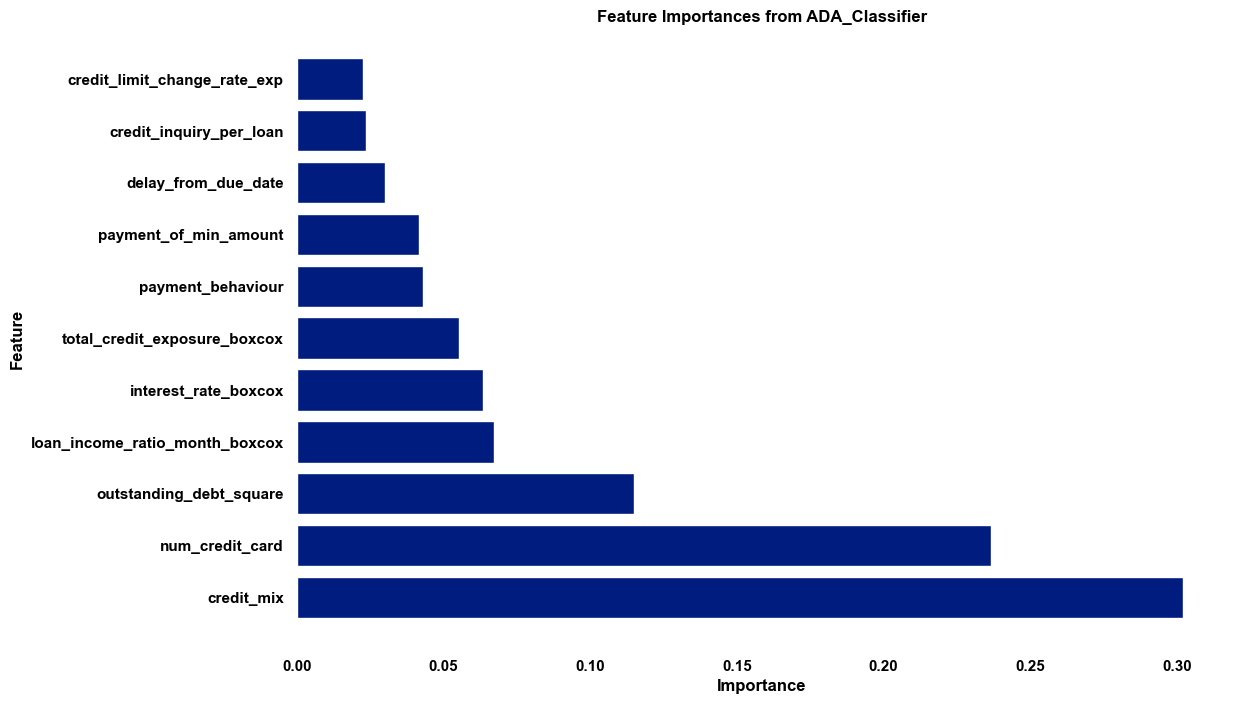

In [54]:
# Get feature importances
feature_importances = ADA_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[ADA_fea].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ADA_Classifier')
plt.show()

In [55]:
params = {'n_neighbors' : [2,3,4,5,6,7]}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled_df,y_train)




Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................n_neighbors=2;, score=0.756 total time=   4.8s
[CV 2/3] END .....................n_neighbors=2;, score=0.769 total time=   4.9s
[CV 3/3] END .....................n_neighbors=2;, score=0.773 total time=   4.9s
[CV 1/3] END .....................n_neighbors=3;, score=0.767 total time=   4.9s
[CV 2/3] END .....................n_neighbors=3;, score=0.779 total time=   4.9s
[CV 3/3] END .....................n_neighbors=3;, score=0.783 total time=   4.9s
[CV 1/3] END .....................n_neighbors=4;, score=0.752 total time=   4.9s
[CV 2/3] END .....................n_neighbors=4;, score=0.770 total time=   4.9s
[CV 3/3] END .....................n_neighbors=4;, score=0.771 total time=   4.9s
[CV 1/3] END .....................n_neighbors=5;, score=0.750 total time=   4.9s
[CV 2/3] END .....................n_neighbors=5;, score=0.768 total time=   4.9s
[CV 3/3] END .....................n_neighbors=5;,

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [56]:
KNN_grid_model.best_params_

{'n_neighbors': 3}

Accuracy Test  - 0.6802333333333334
Accuracy Train - 0.9008241322344903

Precision Test  - 0.7011368568336274
Precision Train - 0.9024011148814589

Recall Test  - 0.6802333333333334
Recall Train - 0.9008241322344903

F1_score Test  - 0.6815322235342633
F1_score Train - 0.8994879970152055

Confusion Matrix Test  -- 
[[6755 1639  411]
 [3568 9784 2521]
 [ 427 1027 3868]]
Confusion Matrix Train -- 
[[33799  1360   558]
 [ 4070 27902  2950]
 [  748   940 34816]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      8805
           1       0.79      0.62      0.69     15873
           2       0.57      0.73      0.64      5322

    accuracy                           0.68     30000
   macro avg       0.66      0.70      0.67     30000
weighted avg       0.70      0.68      0.68     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      0.95      0.91  

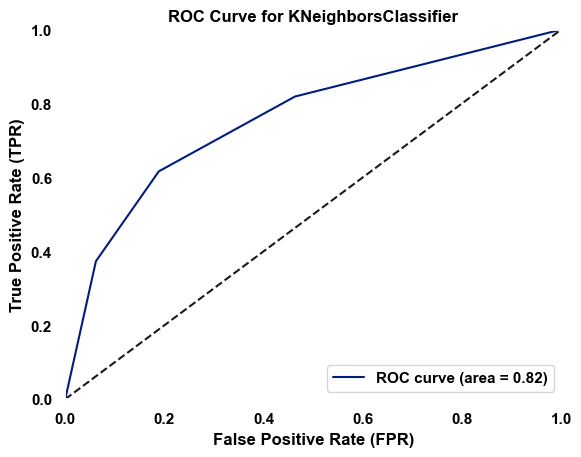

----------------------------------------


In [58]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','payment_behaviour','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log',
    'age_boxcox',]

KN_Classifier = KNeighborsClassifier(n_neighbors=3)
evaluate_model(KN_Classifier,  x_train_scaled_df, y_train, x_test_scaled_df, y_test)

In [ ]:
imp_fea

In [81]:
RF_Classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' :[1,3,6,9],
    'max_leaf_nodes' :[2,6,12,24]

}
kf=KFold(n_splits=3,shuffle=True,random_state=42)

grid_search = GridSearchCV( estimator= RF_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, return_train_score = True)
grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\santhosh\Banking_Analytics\Banking_Analytics\banking\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 20, 'max_leaf_nodes': 24, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [80]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' :[1,3,6,9],
    'max_leaf_nodes' :[2,6,12,24]

}

kf=KFold(n_splits=3,shuffle=True,random_state=42)

ET_grid_search = GridSearchCV( estimator= ET_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, return_train_score = True)
ET_grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
best_params = ET_grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\santhosh\Banking_Analytics\Banking_Analytics\banking\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [82]:
print(best_params)

{'max_depth': 20, 'max_leaf_nodes': 24, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy Test  - 0.6627333333333333
Accuracy Train - 0.7351856864190848

Precision Test  - 0.7253448093718882
Precision Train - 0.7379508758123735

Recall Test  - 0.6627333333333333
Recall Train - 0.7351856864190848

F1_score Test  - 0.6659251790718249
F1_score Train - 0.7306199252113857

Confusion Matrix Test  -- 
[[6680  688 1437]
 [3867 8748 3258]
 [ 145  723 4454]]
Confusion Matrix Train -- 
[[27364  2435  5918]
 [ 7834 20168  6920]
 [  919  4347 31238]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.62      0.76      0.69      8805
           1       0.86      0.55      0.67     15873
           2       0.49      0.84      0.62      5322

    accuracy                           0.66     30000
   macro avg       0.66      0.72      0.66     30000
weighted avg       0.73      0.66      0.67     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.76      0.77      0.76  

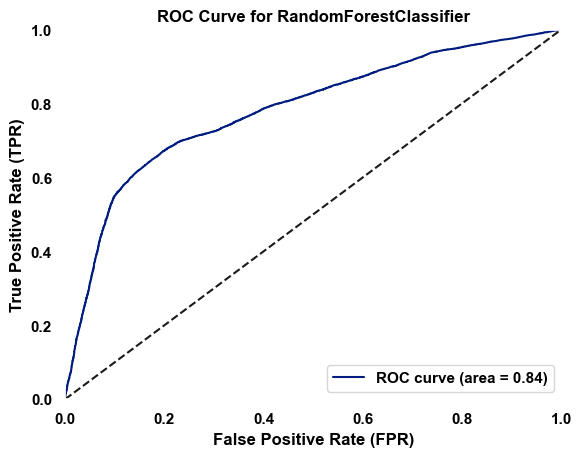

----------------------------------------


In [83]:

RF_Classifier = RandomForestClassifier(n_estimators=100,random_state=42,max_depth = 20,min_samples_split=2,min_samples_leaf =9,max_leaf_nodes  =24)
evaluate_model(RF_Classifier,  x_train_scaled_df[imp_fea], y_train, x_test_scaled_df[imp_fea], y_test)

In [75]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)
evaluate_model(ET_Classifier,  x_train_scaled_df[imp_fea], y_train, x_test_scaled_df[imp_fea], y_test)

KeyboardInterrupt: 

In [26]:
kf=KFold(n_splits=3,shuffle=True,random_state=42)
RF_cv_score = cross_val_score(RF_Classifier,x_train,y_train, cv=kf)
print(f'Cross validations scores \n\n {RF_cv_score}')
print(f'Cross validations scores mean \n\n {np.mean(RF_cv_score)}')

KeyboardInterrupt: 